**Data preprocessing for Avocado price Dataset**

**Importing Libraries:**
First import the necessary libraries for data processing.

*   import numpy as np: Imports the NumPy library and assigns it the alias np.
*   import pandas as pd: Imports the pandas library and assigns it the alias pd.
*   from sklearn.impute import SimpleImputer: Imports the SimpleImputer class from the impute module of the scikit-learn library.
*   from sklearn.preprocessing import StandardScaler: Imports the StandardScaler class from the preprocessing module of scikit-learn.
*   from sklearn.model_selection import train_test_split: Imports the train_test_split function from the model_selection module of scikit-learn.
*  import matplotlib.pyplot as plt: Imports the pyplot module from the matplotlib library and assigns it the alias plt.
*   import seaborn as sns: Imports the seaborn library and assigns it the alias sns.


In [ ]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import Normalizer # used for feature scaling
import matplotlib.pyplot as plt
import seaborn as sns


**Importing dataset:**
Next we need to upload the dataset to Google Colab from local machine or google drive to create machine learning model.

**Loading Data:**

Use pandas to read the dataset into a DataFrame.

In [ ]:
dataset = pd.read_csv('/content/avocado.csv')

**List the categorical and numerical features**

In [ ]:
categorical_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
print("Numerical Features:", numerical_features)

Numerical Features: Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')


In [ ]:
print("Categorical Features:", categorical_features)

Categorical Features: Index(['Date', 'type', 'region'], dtype='object')


**Exploring the Data:**

Use DataFrame methods and attributes like head(), info(), describe(), and shape to understand the structure, types, and basic statistics of the dataset.
Check for missing values using isnull() and sum() or info().

In [ ]:
# Display the first few rows to understand your data
print(dataset.head())
print("******"*10)

# Summary statistics for numerical features
print(dataset.describe())
print("******"*10)

#info
dataset.info()
print("******"*10)

# Checking for missing values across all columns
print(dataset.isnull().sum())
print("******"*10)


        Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  type_encoded  region_encoded  Month  Day  
0  Albany             0               0     12   27  
1  Albany     

In [ ]:
# Percentage of missing values
missing_categorical = (dataset[categorical_features].isnull().sum() / len(dataset)) * 100
print("Percentage of missing values for categorical features:")
print(missing_categorical)
missing_numerical = (dataset[numerical_features].isnull().sum() / len(dataset)) * 100
print("\nPercentage of missing values for numerical features:")
print(missing_numerical)

Percentage of missing values for categorical features:
Date      0.0
type      0.0
region    0.0
dtype: float64

Percentage of missing values for numerical features:
Unnamed: 0      0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


In [ ]:
#Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)

**Handling of Categorical Data**

In [ ]:
label_encoder = LabelEncoder()
dataset['type_encoded'] = label_encoder.fit_transform(dataset['type'])
dataset['region_encoded'] = label_encoder.fit_transform(dataset['region'])

dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_encoded,region_encoded,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,11,29


Examination of spread of data and identification of the numerical features contains outliers

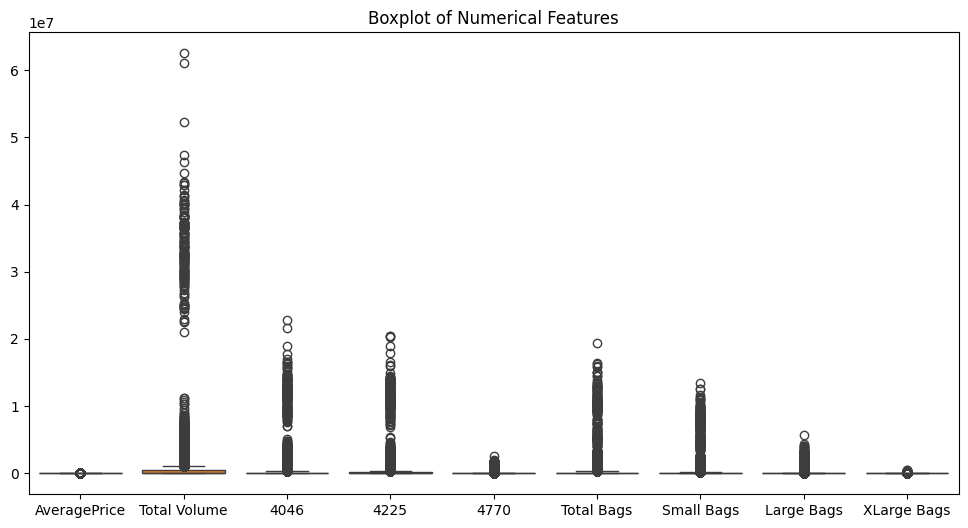

In [ ]:
#distribution of numerical features in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.show()

Performs outlier removal using IQR method and visualization for both numerical and categorical features in the dataset


Summary Statistics After Outlier Removal:
       AveragePrice   Total Volume           4046           4225  \
count  11538.000000   11538.000000   11538.000000   11538.000000   
mean       1.529875   73959.320578   19059.517078   28309.994341   
std        0.356502  108419.105167   42178.274391   55526.062604   
min        0.480000      84.560000       0.000000       0.000000   
25%        1.260000    6442.560000     291.677500    1201.500000   
50%        1.520000   18532.080000    1757.145000    5040.660000   
75%        1.780000  102662.110000   11535.650000   29592.505000   
max        2.490000  783913.050000  276253.480000  369810.830000   

               4770     Total Bags     Small Bags    Large Bags   XLarge Bags  
count  11538.000000   11538.000000   11538.000000  11538.000000  11538.000000  
mean     846.948754   25741.040382   20686.784972   5046.904171      7.350632  
std     2361.849292   34310.418695   30179.910998   9672.040893     34.658052  
min        0.000000     

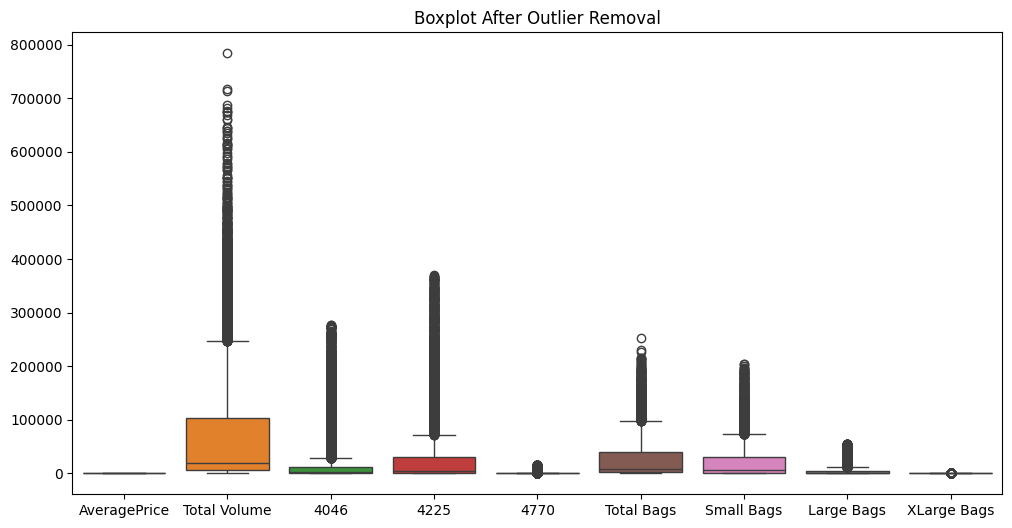

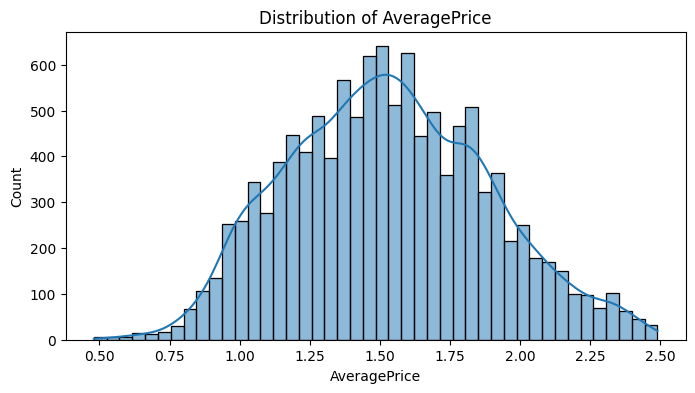

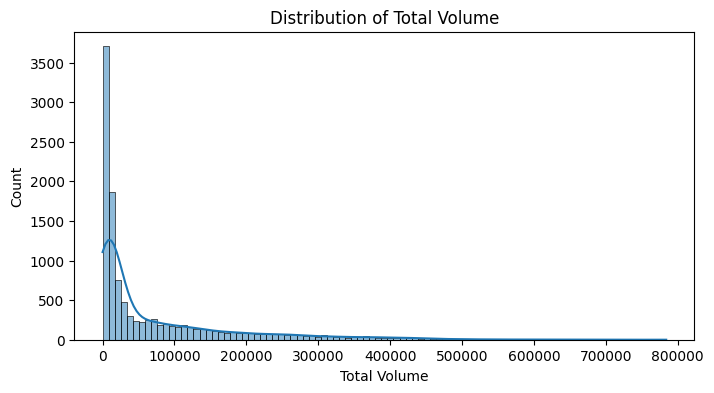

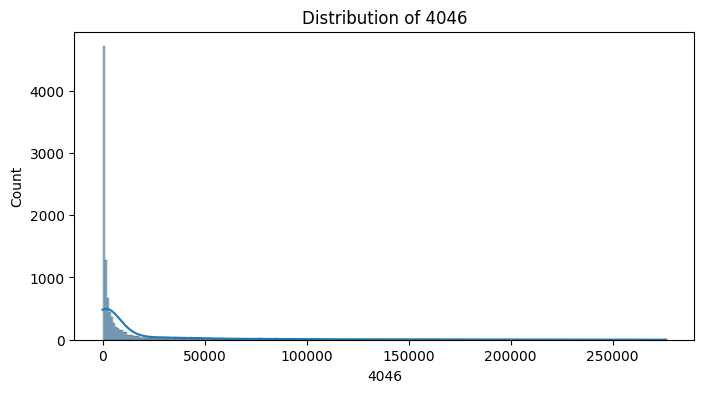

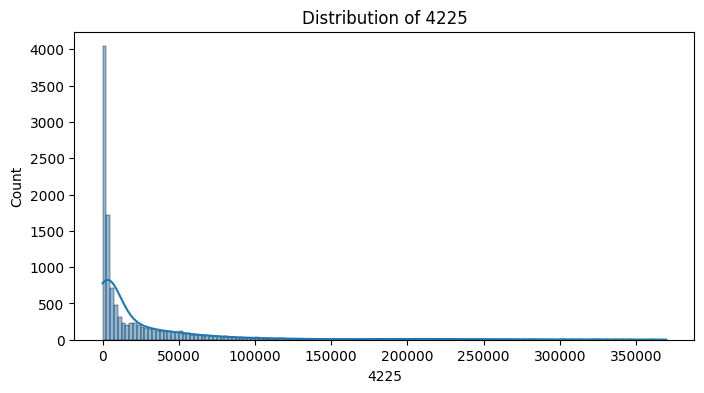

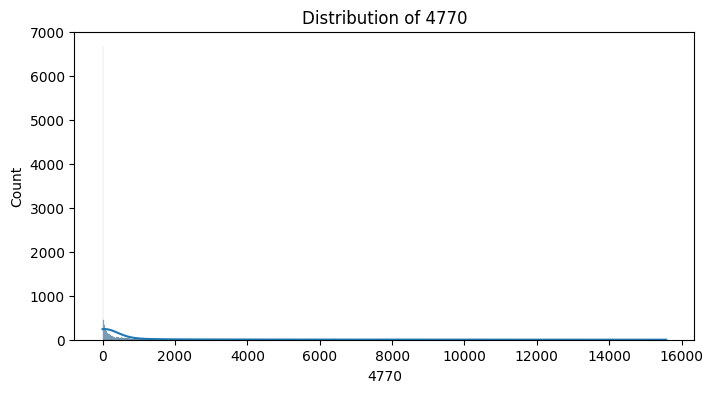

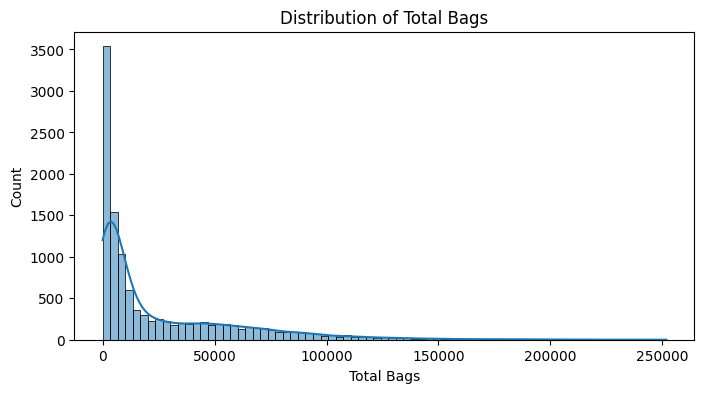

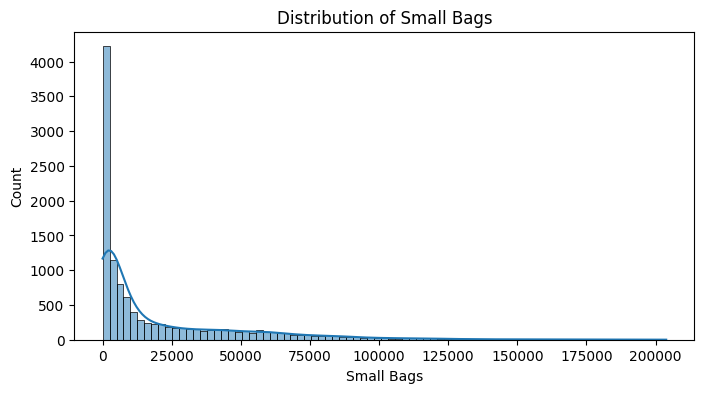

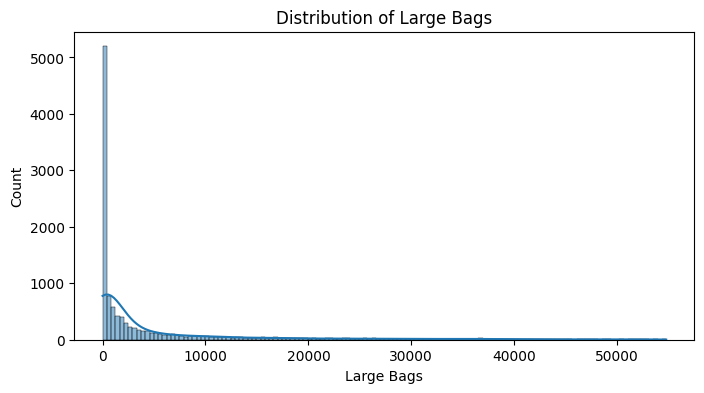

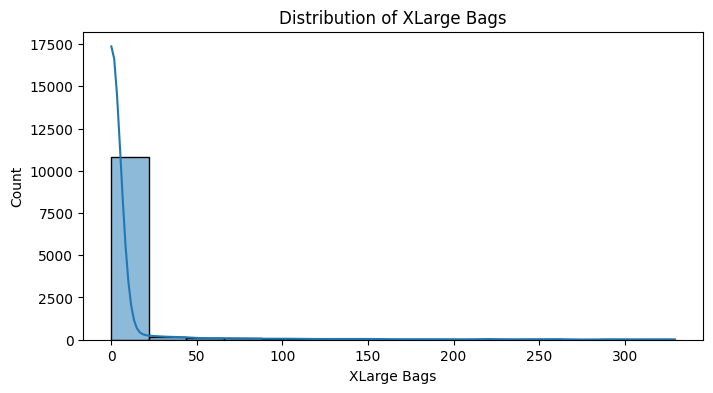

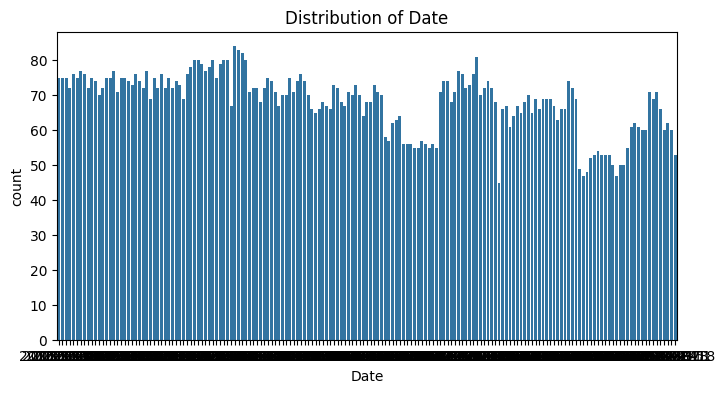

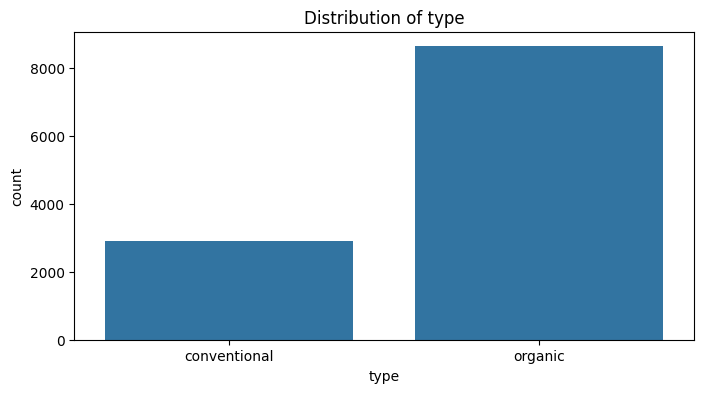

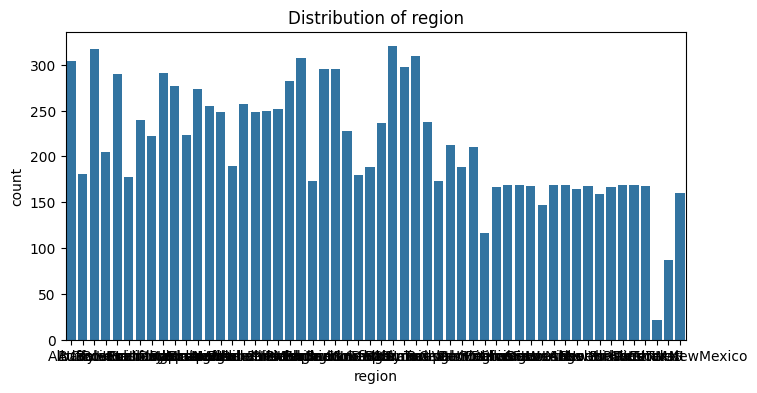

In [ ]:
# Ensure numerical_features is a list
numerical_features = list(numerical_features)

# Calculate Q1, Q3, and IQR for numerical features
Q1 = dataset[numerical_features].quantile(0.25)
Q3 = dataset[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR
df_no_outliers = dataset[~((dataset[numerical_features] < (Q1 - 1.5 * IQR)) | (dataset[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display summary statistics after outlier removal
print("\nSummary Statistics After Outlier Removal:")
print(df_no_outliers[numerical_features].describe())

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numerical_features])
plt.title('Boxplot After Outlier Removal')
plt.show()

# Distribution plot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_no_outliers[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution plot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df_no_outliers)
    plt.title(f'Distribution of {feature}')
    plt.show()


**Data Exploration after data cleaning**

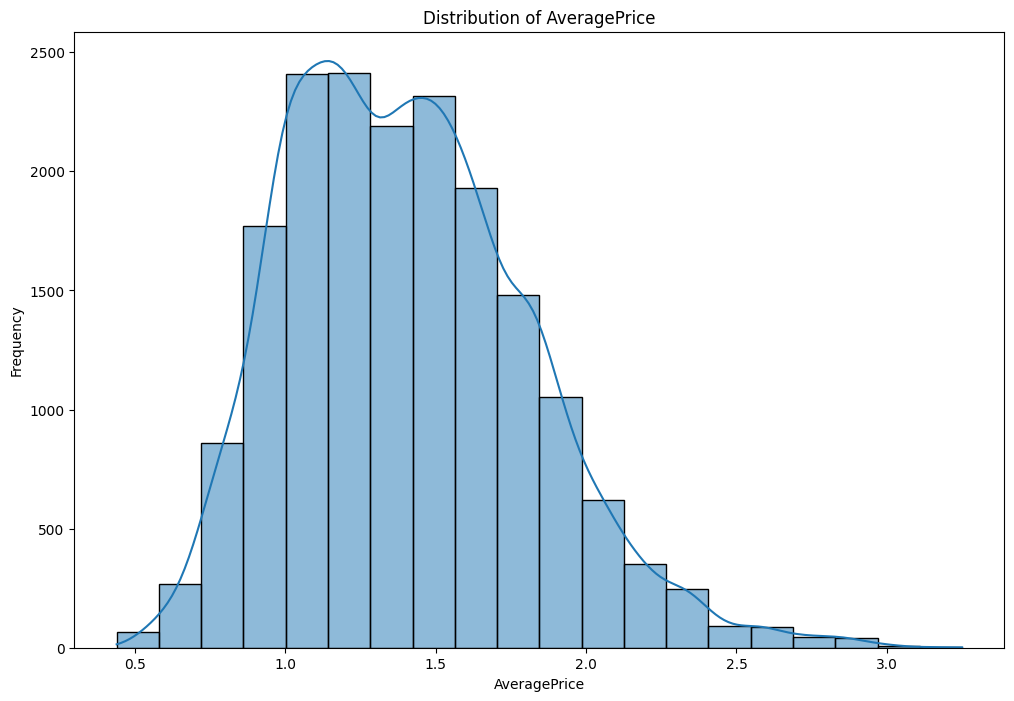

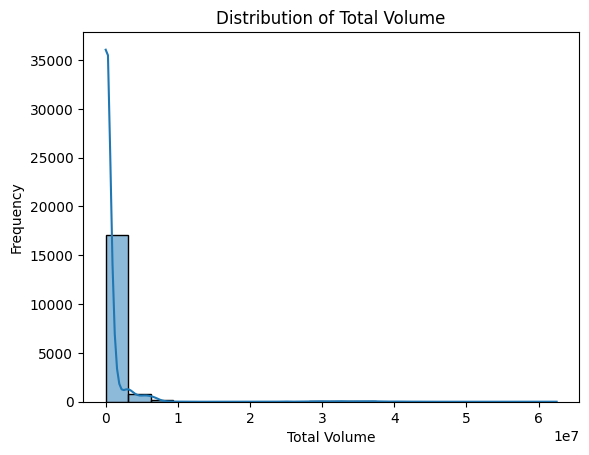

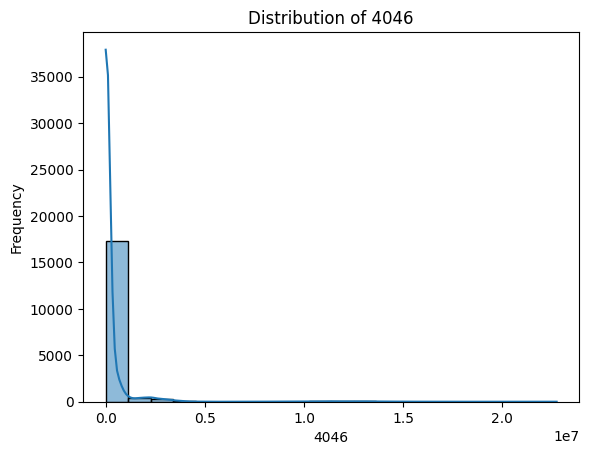

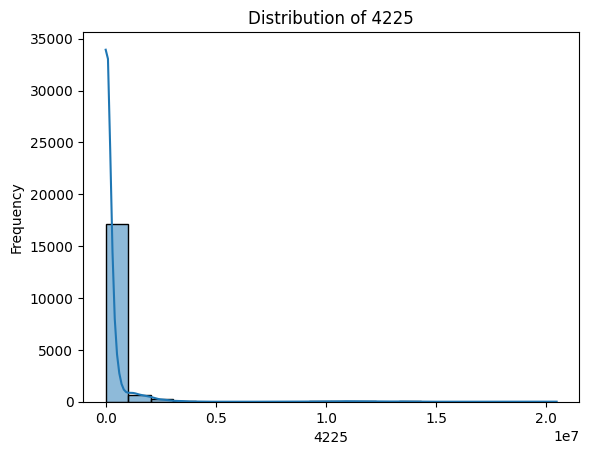

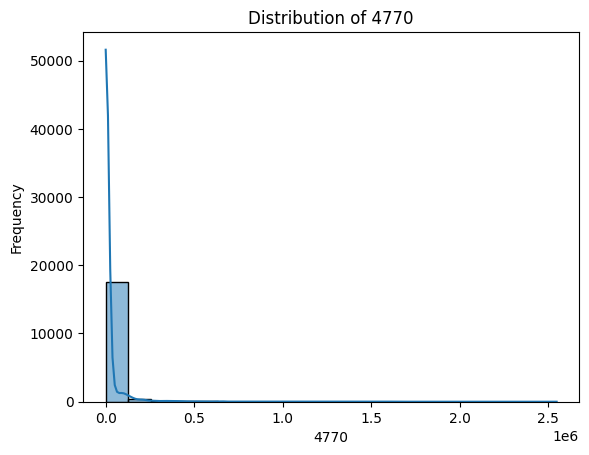

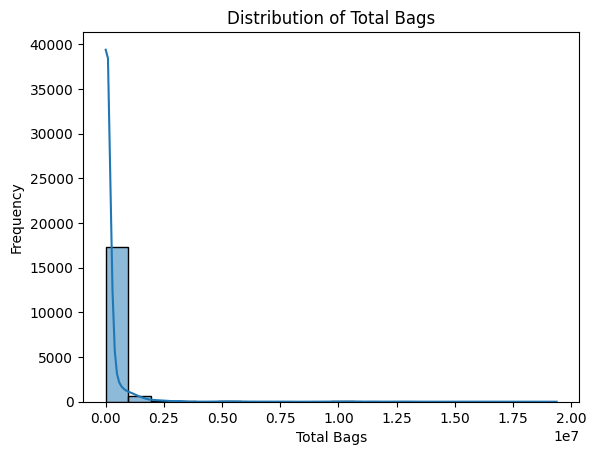

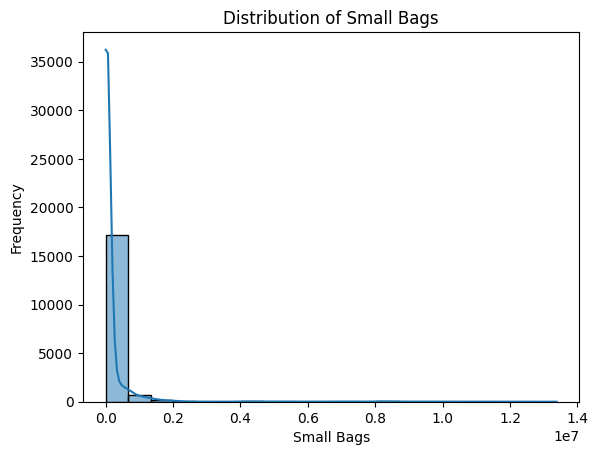

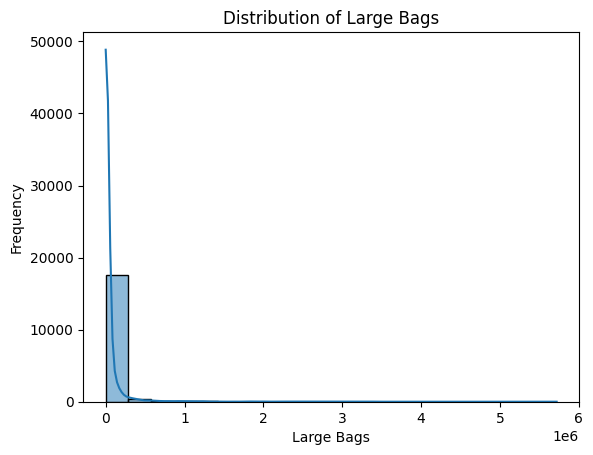

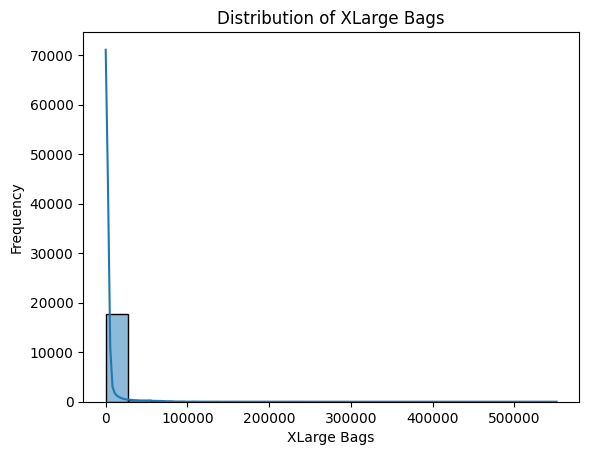

In [ ]:
# Distribution plots for numerical features
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    sns.histplot(dataset[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

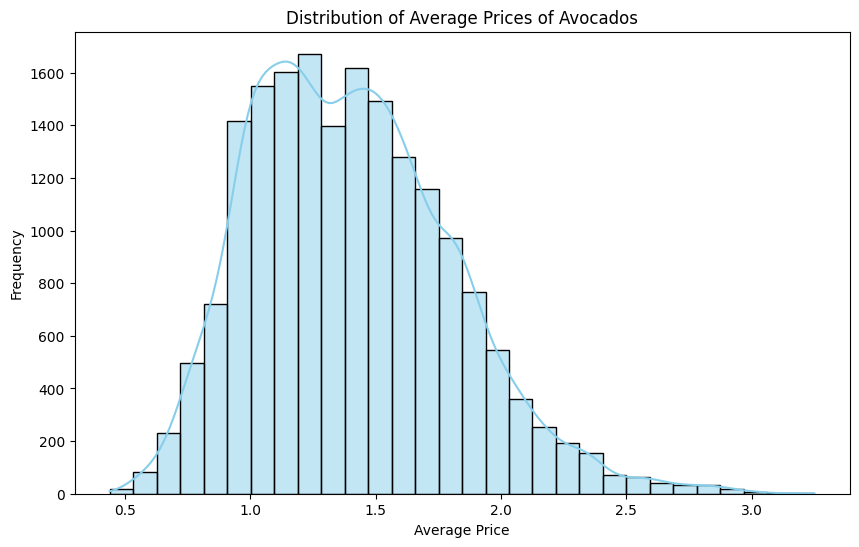

In [ ]:
# Visualize the distribution of average prices of avocados using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['AveragePrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Average Prices of Avocados')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

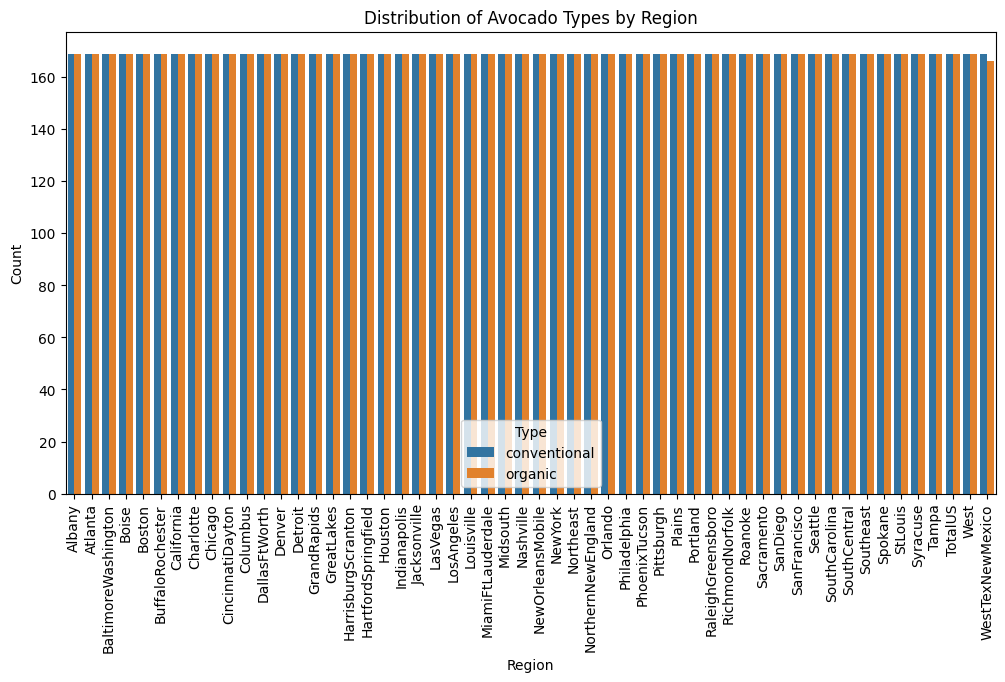

In [ ]:
#distribution of avocado types (organic vs. conventional) vary across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='region', hue='type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Avocado Types by Region')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

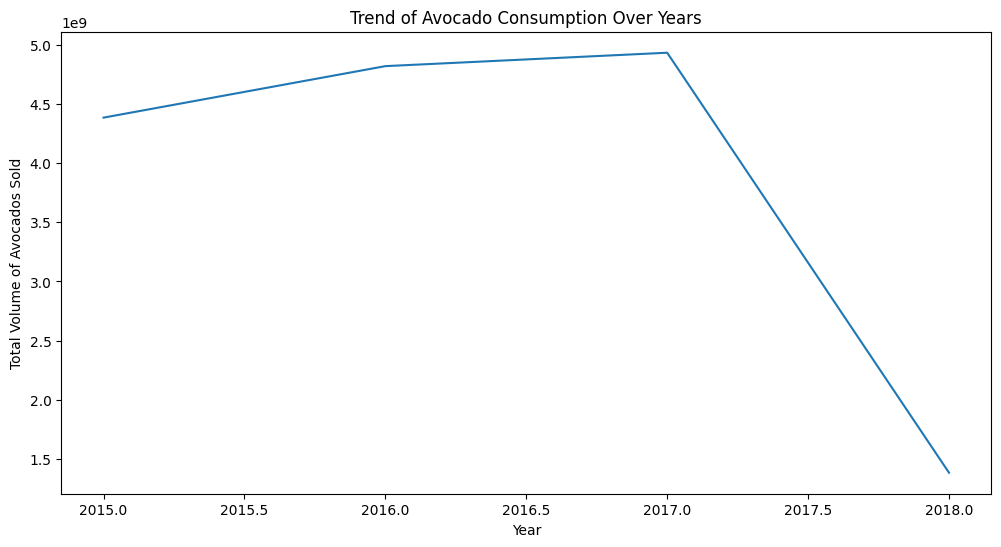

In [ ]:
#avocado consumption over the years covered in the dataset
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='year', y='Total Volume', estimator='sum', errorbar=None)
plt.xlabel('Year')
plt.ylabel('Total Volume of Avocados Sold')
plt.title('Trend of Avocado Consumption Over Years')
plt.show()

**Summary status**

In [ ]:
# Display summary statistics for numerical features
print(dataset.describe())
# For categorical variables, you can use:
print(dataset.select_dtypes(include=['object']).describe())

       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05 

**Linear Regression:**

In [ ]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_encoded,region_encoded,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,11,29


**Scatterplots graph for each of the independent variable against the dependent variable**

In this Independent variables are
*   Total Volume
*   4046 (Total number of avocados with PLU 4046 sold)
*   4225 (Total number of avocados with PLU 4225 sold)
*  Total Bags
*   4770 (Total number of avocados with PLU 4770 sold)

Dependent variable is

*    AveragePrice











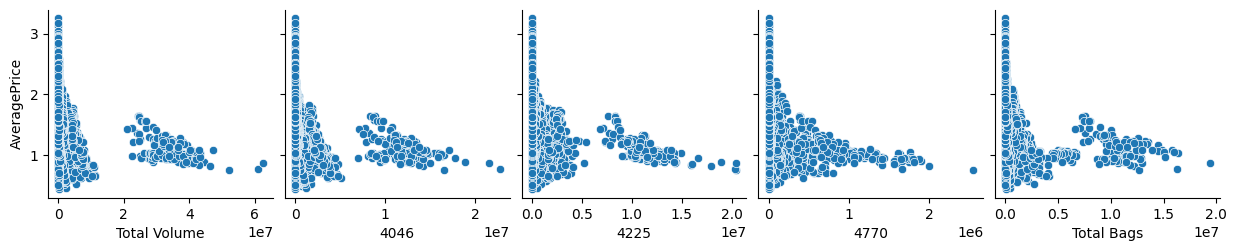

In [ ]:
sns.pairplot(dataset, x_vars=['Total Volume', '4046', '4225', '4770','Total Bags'], y_vars='AveragePrice', kind='scatter')

**Relationship between independent and dependent variable using correlation matrix**

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [ ]:
correlation_matrix = dataset.corr()
print(correlation_matrix)


                AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice        1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume       -0.192752      1.000000  0.977863  0.974181  0.872202   
4046               -0.208317      0.977863  1.000000  0.926110  0.833389   
4225               -0.172928      0.974181  0.926110  1.000000  0.887855   
4770               -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags         -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags         -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags         -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags        -0.117592      0.747157  0.699377  0.688809  0.679861   
year                0.093197      0.017193  0.003353 -0.009559 -0.036531   
type_encoded        0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
region_encoded     -0.011716      0.174176  0.192073  0.145726  0.095252   
Month       

<ipython-input-47-746efd4becee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [ ]:
X = dataset[['Total Volume', '4046', '4225', '4770']]  # Independent variables
y = dataset['AveragePrice']  # Dependent variable

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the Ordinary Least Squares (OLS) model
lm_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the model
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.29e-163
Time:                        19:30:20   Log-Likelihood:                -7071.2
No. Observations:               14599   AIC:                         1.415e+04
Df Residuals:                   14594   BIC:                         1.419e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4227      0.003    424.321   

In [ ]:
# Define the independent variables
X = dataset[['Total Volume', '4046', '4225', '4770', 'Total Bags']]

# Define the dependent variable
y = dataset['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients:", model.coef_)

# Print the intercept of the model
print("Intercept:", model.intercept_)


Coefficients: [ 0.00015556 -0.00015568 -0.00015549 -0.00015593 -0.00015554]
Intercept: 1.4224192452222284


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Assign the dependent variable 'AveragePrice' to y
y = dataset['AveragePrice']

# Step 2: Assign the independent variables 'Total Volume' and 'Total Bags' to X
X = dataset[['Total Volume', 'Total Bags']]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Instantiate a linear regression model
model = LinearRegression()

# Step 5: Fit the model to the training data
model.fit(X_train, y_train)

# Step 6: Predict the prices of avocados using the testing data
y_pred = model.predict(X_test)

# Step 7: Evaluate the performance of the model (e.g., using metrics such as R-squared)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.033722479426424035
Mean Absolute Error (MAE): 0.3164071987719926
Mean Squared Error (MSE): 0.1552509234610522
Root Mean Squared Error (RMSE): 0.3940189379472162
